In [81]:
from __future__ import unicode_literals
%config IPCompleter.greedy=True
# -*- coding: utf-8 -*-
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
from wordcloud import WordCloud
import textwrap
from PIL import Image
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
import mplcursors
import matplotlib.patches as mpatches
from pylab import *
import plotly.express as px
from termcolor import colored
import seaborn as sns
import pygal

In [82]:
data=pd.read_csv('kluczowe_sienkiewicz.csv')

In [83]:
data.head()

,Lemat,Istotność,Frekwencja
0,Winicjusz,31.400637,986
1,Ligia,27.037012,731
2,rzec,24.927009,650
3,cezar,24.738917,614
4,Petroniusz,24.527587,602


In [84]:
df = pd.DataFrame(data[:20])

In [85]:
fig = px.bar(df, x='Lemat', y='Istotność', hover_data=['Frekwencja'])
fig.update_layout(
    showlegend=True,
    title_text="Słowa kluczowe wg istotności",
    height=500,
    width=800,
)
fig.show()

In [86]:
df = pd.DataFrame(data)
data = dict(zip(df['Lemat'].tolist(), df['Istotność'].tolist()))

In [87]:
cloud_mask = np.array(Image.open('cloudmask.png'))
wc = WordCloud(width=1200,height=600,max_words=200,background_color='white',mask=cloud_mask).generate_from_frequencies(data)

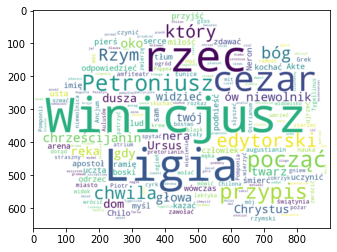

In [88]:
plt.imshow(wc, interpolation='bilinear')

In [89]:
f=codecs.open('sienkiewicz.txt', 'r', 'utf-8')
text_data = f.read()

In [90]:
text_data_copy = text_data
text=[]
segments_list=[]
n=14500
while(len(text_data_copy.split())>=n):
    for word in text_data_copy.split():
        text.append(word)
    topn = text[:n]
    str2 = ' '.join(topn)
    segments_list.append(str2)
    text_data_copy = ' '.join(text_data_copy.split()[n:])
    text.clear()

In [91]:
import collections
my_lists = collections.defaultdict(list)
terms = ['Winicjusz', 'cezar', 'Petroniusz']
array_name = "array"
d = {}
for i in range(len(terms)):
    array_i = array_name + f'{i}'
    for j in segments_list:
        my_lists[array_i].append(j.count(terms[i]))
    s = pd.Series(my_lists[array_i])
    d[terms[i]] = s

In [92]:
df_segments=pd.DataFrame(d)
df_segments

,Winicjusz,cezar,Petroniusz
0,76,59,104
1,77,80,39
2,93,42,94
3,93,16,9
4,123,13,9
5,89,44,48
6,58,65,54
7,109,32,21
8,92,66,86
9,98,40,53


Text(0, 0.5, 'skumulowana liczba wystąpień słów')

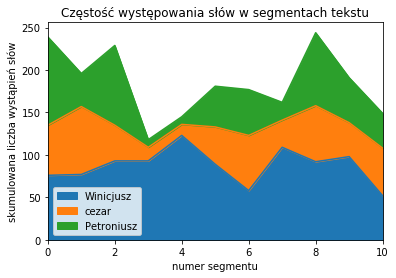

In [93]:
ax = df_segments[:11].plot(kind='area', title='Częstość występowania słów w segmentach tekstu')
ax.set_xlabel("numer segmentu")
ax.set_ylabel("skumulowana liczba wystąpień słów")

Text(0, 0.5, 'numer segmentu')

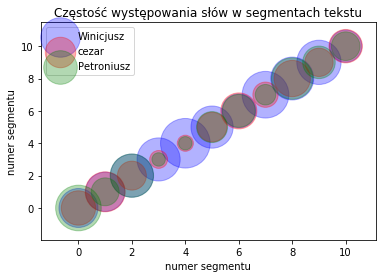

In [94]:
segment_no = range(0, len(segments_list)-1)
plt.scatter(segment_no, segment_no, s=df_segments[terms[0]]*20, alpha=0.3, color='b', label=terms[0])
plt.scatter(segment_no, segment_no, s=df_segments[terms[1]]*20, alpha=0.3, color='r', label=terms[1])
plt.scatter(segment_no, segment_no, s=df_segments[terms[2]]*20, alpha=0.3, color='g', label=terms[2])
plt.title("Częstość występowania słów w segmentach tekstu")
plt.legend()
plt.xlabel('numer segmentu')
plt.ylabel('numer segmentu')

Text(0, 0.5, 'liczność słowa')

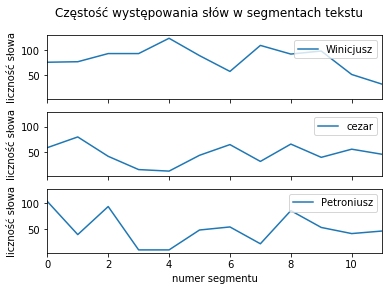

In [95]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all', sharey='all')
fig.suptitle("Częstość występowania słów w segmentach tekstu")
line1=df_segments[terms[0]].plot(ax=axes[0], label=terms[0])
line2=df_segments[terms[1]].plot(ax=axes[1], label=terms[1])
line3=df_segments[terms[2]].plot(ax=axes[2], label=terms[2])
line1.legend(loc="upper right")
line2.legend(loc="upper right")
line3.legend(loc="upper right")
line1.set_xlabel("numer segmentu")
line2.set_xlabel("numer segmentu")
line3.set_xlabel("numer segmentu")
line1.set_ylabel("liczność słowa")
line2.set_ylabel("liczność słowa")
line3.set_ylabel("liczność słowa")

In [96]:
tokens = nltk.word_tokenize(text_data)

def lowercase(tokens):
    return [token.lower() for token in tokens]

def remove_tokens(tokens, remove_tokens):
    return [token for token in tokens if token not in remove_tokens]

tokens = remove_tokens(tokens, punctuation)
tokens = lowercase(tokens)

In [97]:
keyword=terms[0].lower()+'a'
keyword_indexes_list = [i for i, x in enumerate(tokens) if x == keyword]

In [98]:
result= pd.DataFrame(pd.Series(['left', 'keyword', 'right'], index = ['left', 'keyword', 'right']))
j=0
for i in keyword_indexes_list:
    right = tokens[i+1:i+5]
    left = tokens[i-5:i]
    result[j]= pd.DataFrame(pd.Series([left, keyword, right], index = ['left', 'keyword', 'right']))
    j=j+1
result.drop(result.columns[0], axis=1)
result.T[:10]

,left,keyword,right
0,"[jakby, wykute, z, marmuru, ciało]",winicjusza,"[—, gdyby, lizypp, był]"
1,"[unctuarium65, ale, w, unctuarium, uwaga]",winicjusza,"[zwróciła, się, na, co]"
2,"[atletyczny, piękniejszy, był, nawet, od]",winicjusza,"[kobiety, w, rzymie, podziwiały]"
3,"[uwagi, jeno, uśmiechnąwszy, się, do]",winicjusza,"[począł, cytować, mu, w]"
4,"[po, czym, zwrócił, się, do]",winicjusza,"[—, o, ty, wiosenny]"
5,"[przez, te, tłumy, o, uszy]",winicjusza,"[obijało, się, ustawiczne, „]"
6,"[się, z, tą, uwagą, do]",winicjusza,"[gdy, wtem, niewolnik, velarius129]"
7,"[na, ligię, mały, aulus, ujrzawszy]",winicjusza,"[przybiegł, się, z, nim]"
8,"[mały, aulus, który, podczas, pobytu]",winicjusza,"[w, domu, zaprzyjaźnił, się]"
9,"[której, barbarzyńskim, pochodzeniu, był, przez]",winicjusza,"[uprzedzony, spojrzał, też, pytającym]"


In [99]:
many_segments_list = textwrap.wrap(text_data,1000)

searched=terms[0]

print('Lokalizacja występowania słowa ' + searched + ' w tekście:')

i=0
for segment in many_segments_list:
    if(i%45==0):
        print('')
    i=i+1
    if(searched in segment):
        print('|', end='')
    else:
        print('.', end='')

Lokalizacja występowania słowa Winicjusz w tekście:

..|||||||.|.|||.|.....||.|.|.||...|.||||.|||.
.||.|||||||||||||.||...........||...|.|||||.|
.||..........||......|.|.|.||||.|...........|
|.....||||..||||.||......|..||...||||||||.|||
|..||...|||||||.|.||||||||.||||....||||.|.|..
|.||||.||.|...|.|||.||.||..||||....|...||..||
.||.|||||.............||........|||.|||.||||.
.|||.||||||||||||.|||.|..|.|.|.|||||..||..|.|
|||||||||.|||||||||||||||..|||.||||||||||||||
.|.||||||.||.|||||||||||||||||||..|||||||||||
.|.|.....||..|..........|...||||.||..|||.||||
...||||..|||||.|....|.|.|.|||||||.|..|||.||.|
|.|||....|.|||||||||||..||||||.|.|...........
....||...|.....|....||||...|.....|||...|...|.
|..|.||...||.||||.|||||||||||.||||||.||||||.|
||||||.||||...|.....||||.|||||||||....|......
.............|||.|.||||..............||.|....
....|||||.||.||||...||||.|..|||.|||...||.||.|
||||.|||.....||||||||||||||||||||.......||||.
||||..................|.................|||||
||||||||||||.||.||.........

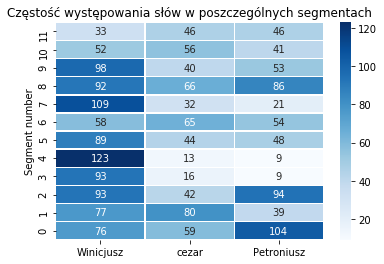

In [100]:
fig=sns.heatmap(df_segments[::-1], annot=True, fmt="d", linewidths=.5, cmap='Blues')
plt.ylabel("Segment number")
plt.title("Częstość występowania słów w poszczególnych segmentach")
plt.show(fig)